In [90]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

df = web.DataReader('TSLA', 'yahoo',start,end)    #reading yahoo finance
print(df.head())


             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222


In [91]:
df.reset_index(inplace=True)
df.set_index('Date',inplace=True)
# df.drop(['Adj Close'],axis=1,inplace=True)
df.head().round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.00,3.51,3.80,4.78,93831500,4.78
2010-06-30,6.08,4.66,5.16,4.77,85935500,4.77
2010-07-01,5.18,4.05,5.00,4.39,41094000,4.39
2010-07-02,4.62,3.74,4.60,3.84,25699000,3.84
2010-07-06,4.00,3.17,4.00,3.22,34334500,3.22


In [92]:
df.to_csv('TSLA.csv')

In [93]:
df2 = pd.read_csv('TSLA.csv',parse_dates=True,index_col=0)
df2.round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.00,3.51,3.80,4.78,93831500,4.78
2010-06-30,6.08,4.66,5.16,4.77,85935500,4.77
2010-07-01,5.18,4.05,5.00,4.39,41094000,4.39
2010-07-02,4.62,3.74,4.60,3.84,25699000,3.84
2010-07-06,4.00,3.17,4.00,3.22,34334500,3.22
...,...,...,...,...,...,...
2016-12-23,42.69,41.54,41.60,42.67,23352500,42.67
2016-12-27,44.45,42.88,42.98,43.91,29578500,43.91
2016-12-28,44.76,43.44,44.31,43.95,18912500,43.95


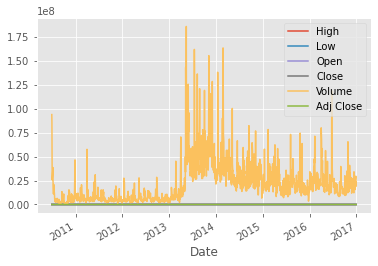

In [94]:
df.plot()
plt.show()

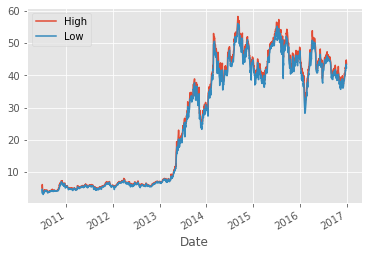

In [95]:
df[['High','Low']].plot()

In [104]:
df['100ma']=df['Adj Close'].rolling(window=100,min_periods=0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778,4.778000
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766,4.772000
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392,4.645333
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840,4.444000
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222,4.199600


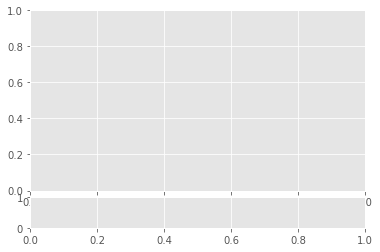

In [112]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)